In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulación de interrogación 2

Vamos a trabajar con el dataset de [All the Earthquakes Dataset : from 1990-2023](https://www.kaggle.com/datasets/alessandrolobello/the-ultimate-earthquake-dataset-from-1990-2023)

El siguiente dataset es una base de datos que contiene todos los sismos entre los años 1990 y 2023 (mas de 3.5M de muestras), de la cual se ha tomado un segmento de muestras de 10.000 (aproximadamente) datos para poder implementar algoritmos de aprendizaje supervisado.







In [4]:
earthquakes = pd.read_csv('earthquakes.csv', encoding='utf-8')
earthquakes

,time,place,status,tsunami,significance,data_type,magnitude,state,longitude,latitude,depth,date,days_since_last
0,746378873660,"70 km WNW of Yakutat, AK",reviewed,0,39,earthquake,1.6,AK,-140.8333,59.8255,-3.0,1993-08-26 15:27:53.660000+00:00,NaN
1,1574384878869,"3 km S of Point MacKenzie, AK",reviewed,1,334,earthquake,4.0,AK,-149.9808,61.3339,46.6,2019-11-22 01:07:58.869000+00:00,9583.0
2,636670273060,"70 km ESE of Khand?d, Afghanistan",reviewed,0,500,earthquake,5.7,Afghanistan,73.0610,36.7380,10.0,1990-03-05 20:51:13.060000+00:00,NaN
3,649952770970,"21 km ENE of Jurm, Afghanistan",reviewed,0,271,earthquake,4.2,Afghanistan,71.0690,36.9060,33.0,1990-08-06 14:26:10.970000+00:00,153.0
4,667312403790,"68 km SSW of Jurm, Afghanistan",reviewed,0,465,earthquake,5.5,Afghanistan,70.6450,36.2700,154.7,1991-02-23 12:33:23.790000+00:00,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10621,879035094040,western Xizang,reviewed,0,432,earthquake,5.3,western Xizang,88.2810,33.6780,33.0,1997-11-09 00:24:54.040000+00:00,0.0
10622,1080413249200,western Xizang,reviewed,0,554,earthquake,6.0,western Xizang,89.1790,33.9540,8.0,2004-03-27 18:47:29.200000+00:00,2330.0
10623,1176135819930,western Xizang,reviewed,0,369,earthquake,4.9,western Xizang,89.4210,35.6890,40.4,2007-04-09 16:23:39.930000+00:00,1107.0
10624,1212949483560,western Xizang,reviewed,0,400,earthquake,5.1,western Xizang,85.2430,32.4470,10.0,2008-06-08 18:24:43.560000+00:00,426.0


In [5]:
earthquakes['tsunami'].unique()

array([0, 1], dtype=int64)

In [6]:
earthquakes['magnitude'].unique()

array([1.6       , 4.        , 5.7       , 4.2       , 5.5       ,
       4.5       , 6.7       , 4.6       , 7.        , 6.        ,
       6.3       , 3.9       , 6.4       , 3.3       , 5.2       ,
       6.5       , 7.4       , 4.9       , 3.5       , 4.4       ,
       3.1       , 3.7       , 4.1       , 6.6       , 7.5       ,
       6.1       , 2.        , 3.        , 1.8       , 2.3       ,
       2.7       , 7.1       , 1.7       , 2.8       , 1.9       ,
       2.1       , 2.5       , 0.9       , 2.2       , 2.9       ,
       0.5       , 2.4       , 0.3       , 6.9       , 2.6       ,
       3.2       , 3.4       , 3.8       , 1.5       , 5.9       ,
       7.9       , 5.        , 0.4       , 3.6       , 5.4       ,
       6.2       , 4.8       , 1.2       , 1.3       , 1.4       ,
       0.2       , 0.8       , 1.1       , 1.        , 0.6       ,
       0.7       , 6.8       , 5.8       , 7.2       , 5.6       ,
       5.3       , 4.3       , 4.7       , 5.1       , 0.1    

### La columna Tsunami es una columna binaria de 0 y 1, por lo que la podemos usar para hacer clasificaciones: En base a la información de las otras columnas vamos a clasificar si un suceso es un tsunami (1) o no (0).

### En cambio con la columna magnitude, podemos hacer una regresión para predecir la magnitud de un terremoto en función de las otras variables. 

### Paso 1: Elección de las columnas y preprocesamiento de los datos

Para elegir las columnas, debemos tener en consideración lo que hemos venido diciendo en las ayudantías pasadas:


## Valores nulos
Vamos a revisar si las columnas poseen valores nulos.

In [9]:
for col in earthquakes:
    nulos = earthquakes[col].isna().sum()
    print('-------------------')
    print(f'La columna {col} posee {nulos} nulos')

-------------------
La columna time posee 0 nulos
-------------------
La columna place posee 0 nulos
-------------------
La columna status posee 0 nulos
-------------------
La columna tsunami posee 0 nulos
-------------------
La columna significance posee 0 nulos
-------------------
La columna data_type posee 0 nulos
-------------------
La columna magnitude posee 0 nulos
-------------------
La columna state posee 0 nulos
-------------------
La columna longitude posee 0 nulos
-------------------
La columna latitude posee 0 nulos
-------------------
La columna depth posee 0 nulos
-------------------
La columna date posee 176 nulos
-------------------
La columna days_since_last posee 478 nulos


### ¿Cómo tratamos los valores nulos?


Considera que el dataset contiene 10.000 filas y el máximo valor de valores nulos por columna es 478, lo que indica una pérdida de información de $\frac{478}{10000}*100=4,78\%$


In [11]:
##Escribe aquí tu respuesta
earthquakes.dropna(inplace=True)


In [12]:
earthquakes

,time,place,status,tsunami,significance,data_type,magnitude,state,longitude,latitude,depth,date,days_since_last
1,1574384878869,"3 km S of Point MacKenzie, AK",reviewed,1,334,earthquake,4.0,AK,-149.9808,61.3339,46.6,2019-11-22 01:07:58.869000+00:00,9583.0
3,649952770970,"21 km ENE of Jurm, Afghanistan",reviewed,0,271,earthquake,4.2,Afghanistan,71.0690,36.9060,33.0,1990-08-06 14:26:10.970000+00:00,153.0
4,667312403790,"68 km SSW of Jurm, Afghanistan",reviewed,0,465,earthquake,5.5,Afghanistan,70.6450,36.2700,154.7,1991-02-23 12:33:23.790000+00:00,200.0
5,667833410210,"38 km SW of Ashk?sham, Afghanistan",reviewed,0,312,earthquake,4.5,Afghanistan,71.2880,36.4000,105.9,1991-03-01 13:16:50.210000+00:00,6.0
6,679482551910,"53 km SW of Ashk?sham, Afghanistan",reviewed,0,691,earthquake,6.7,Afghanistan,71.1190,36.3340,212.9,1991-07-14 09:09:11.910000+00:00,134.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10618,1456608583570,western Indian-Antarctic Ridge,reviewed,0,572,earthquake,6.1,western Indian-Antarctic Ridge,139.5956,-51.7897,10.0,2016-02-27 21:29:43.570000+00:00,372.0
10621,879035094040,western Xizang,reviewed,0,432,earthquake,5.3,western Xizang,88.2810,33.6780,33.0,1997-11-09 00:24:54.040000+00:00,0.0
10622,1080413249200,western Xizang,reviewed,0,554,earthquake,6.0,western Xizang,89.1790,33.9540,8.0,2004-03-27 18:47:29.200000+00:00,2330.0
10623,1176135819930,western Xizang,reviewed,0,369,earthquake,4.9,western Xizang,89.4210,35.6890,40.4,2007-04-09 16:23:39.930000+00:00,1107.0


### Paso 2: Preprocesar los datos

Cómo podrás observar los datos contienen columnas numéricas y categóricas(strings). 


In [14]:
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10148 entries, 1 to 10624
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             10148 non-null  int64  
 1   place            10148 non-null  object 
 2   status           10148 non-null  object 
 3   tsunami          10148 non-null  int64  
 4   significance     10148 non-null  int64  
 5   data_type        10148 non-null  object 
 6   magnitude        10148 non-null  float64
 7   state            10148 non-null  object 
 8   longitude        10148 non-null  float64
 9   latitude         10148 non-null  float64
 10  depth            10148 non-null  float64
 11  date             10148 non-null  object 
 12  days_since_last  10148 non-null  float64
dtypes: float64(5), int64(3), object(5)
memory usage: 1.1+ MB


## Hagamos un Pairplot para ver algunas correlaciones entre datos.

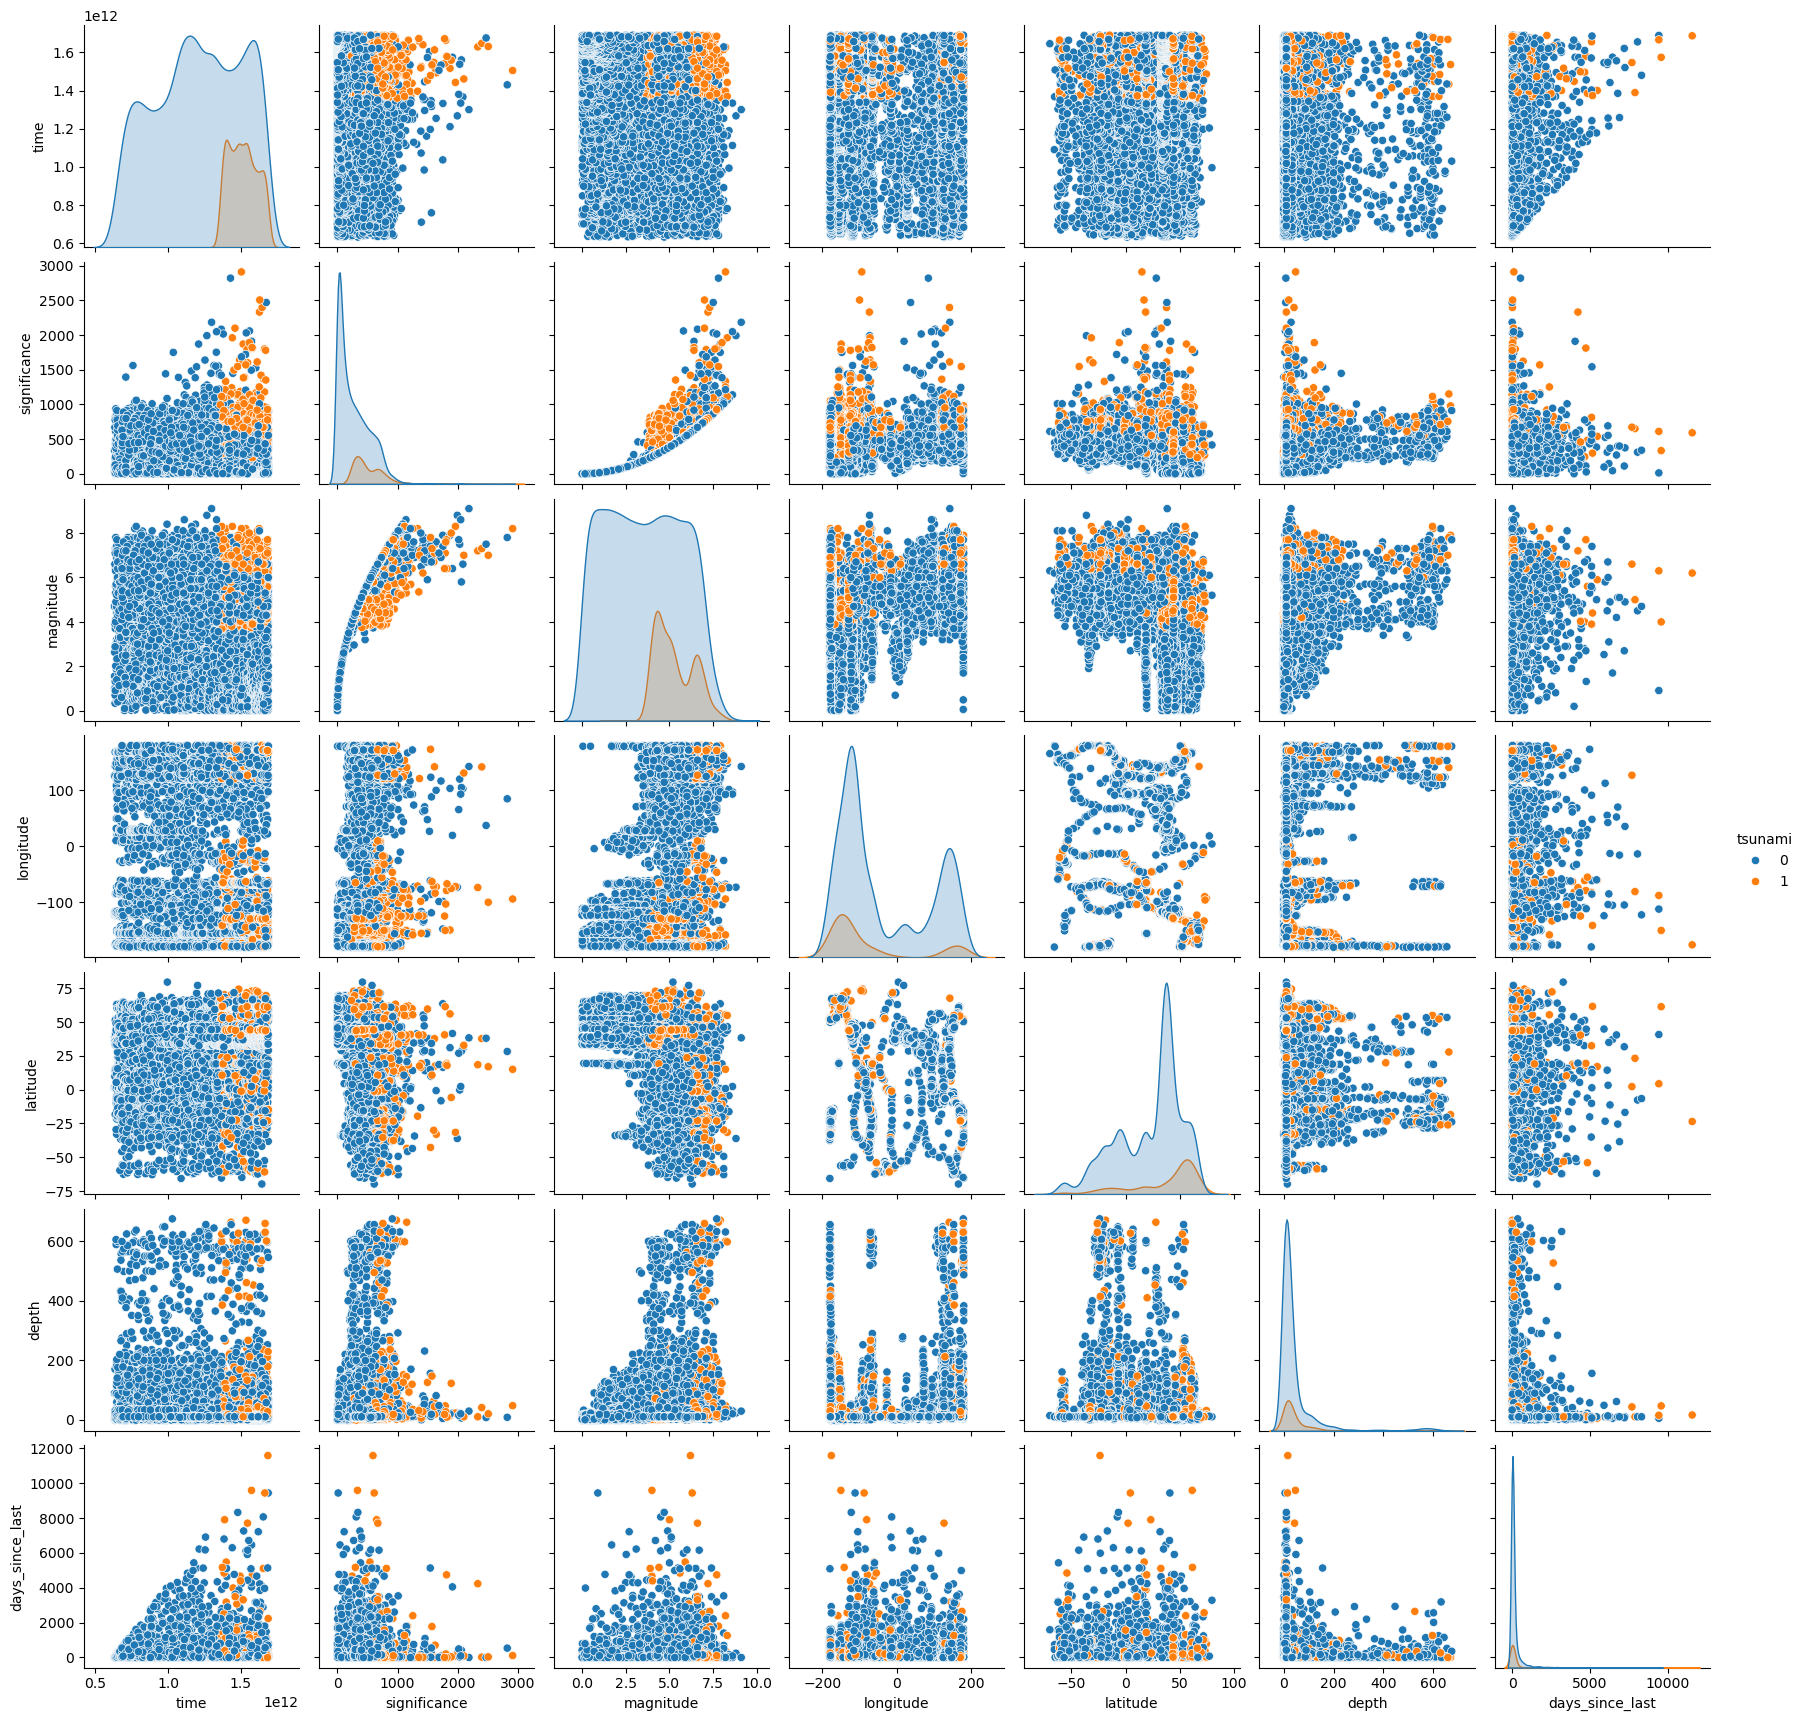

In [16]:
sns.pairplot(earthquakes, hue='tsunami')

# Columnas que vamos a eliminar

### Algunas tienen datos que terminan siendo demasiados para procesarlos en nuestro modelo mediante un Encoding (Es decir, convirtiéndolos a números)

In [19]:
### Por ejemplo la columna place, que indica el lugar 

len(earthquakes['place'].unique())

8183

### State tiene información útil pero que es redundante, porque hay otras columnas que entregan la misma información (Por ejemplo latitud y longitud es numérica y entrega una posición georreferenciada exacta en lugar del estado)

In [21]:
print(earthquakes['state'].unique()) 

[' AK' ' Afghanistan' ' Alaska' ' Albania' ' Aleutian Islands' ' Algeria'
 ' American Samoa' ' Anguilla' ' Antigua and Barbuda' ' Argentina'
 ' Arizona' ' Arkansas' ' Australia' ' Austria' ' Azerbaijan' ' B.C.'
 ' Barbados' ' Bolivia' ' Bosnia and Herzegovina' ' Brazil' ' Bulgaria'
 ' California' ' Canada' ' Canada region' ' Cayman Islands' ' Chile'
 ' China' ' Colombia' ' Colorado' ' Costa Rica' ' Croatia' ' Cuba'
 ' Cyprus' ' Czechia' ' Democratic Republic of the Congo' ' Dominica'
 ' Dominican Republic' ' Ecuador' ' Egypt' ' El Salvador' ' Ethiopia'
 ' Federated States of Micronesia' ' Fiji' ' France' ' Georgia' ' Germany'
 ' Greece' ' Guadeloupe' ' Guam' ' Guatemala' ' HI' ' Haiti' ' Hawaii'
 ' Honduras' ' Iceland' ' Idaho' ' India' ' India region' ' Indonesia'
 ' Iran' ' Iraq' ' Italy' ' Jamaica' ' Japan' ' Japan region'
 ' Kahramanmaras earthquake sequence' ' Kansas' ' Kazakhstan'
 ' Kyrgyzstan' ' Laikit II (Dimembe)' ' Malawi' ' Martinique' ' Mexico'
 ' Micronesia' ' Minnesota' 

## Como observación final, la columna date y time entregan información en unidad de tiempo. Para efectos de la ayudantía solo nos quedaremos con time

Así, finalmente, las columnas que vamos a eliminar son:

['place', 'state', 'date']

In [40]:
earthquakes.drop(['place', 'state', 'date'], axis='columns', inplace=True)
earthquakes

KeyError: "['place', 'state', 'date'] not found in axis"

# Columna a las que le aplicaremos un Encoding

### La columna Status tiene un problema en sus datos:

In [43]:
print(earthquakes['status'].unique()) 

['reviewed' 'automatic' 'REVIEWED']


### ¿Como lo arreglarias?

In [45]:
##Escribe aquí tu respuesta
earthquakes = earthquakes.replace("REVIEWED", "reviewed")
print(earthquakes['status'].unique()) 

['reviewed' 'automatic']


### Esta celda la vamos a usar para aplicar el encoding

In [47]:
dummies = pd.get_dummies(earthquakes['status']).map(lambda x: int(x))
dummies

,automatic,reviewed
1,0,1
3,0,1
4,0,1
5,0,1
6,0,1
...,...,...
10618,0,1
10621,0,1
10622,0,1
10623,0,1


In [49]:
earthquakes.drop(['status'],axis='columns', inplace=True)
earthquakes = pd.concat([earthquakes,dummies], axis=1)
earthquakes

,time,tsunami,significance,data_type,magnitude,longitude,latitude,depth,days_since_last,automatic,reviewed
1,1574384878869,1,334,earthquake,4.0,-149.9808,61.3339,46.6,9583.0,0,1
3,649952770970,0,271,earthquake,4.2,71.0690,36.9060,33.0,153.0,0,1
4,667312403790,0,465,earthquake,5.5,70.6450,36.2700,154.7,200.0,0,1
5,667833410210,0,312,earthquake,4.5,71.2880,36.4000,105.9,6.0,0,1
6,679482551910,0,691,earthquake,6.7,71.1190,36.3340,212.9,134.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
10618,1456608583570,0,572,earthquake,6.1,139.5956,-51.7897,10.0,372.0,0,1
10621,879035094040,0,432,earthquake,5.3,88.2810,33.6780,33.0,0.0,0,1
10622,1080413249200,0,554,earthquake,6.0,89.1790,33.9540,8.0,2330.0,0,1
10623,1176135819930,0,369,earthquake,4.9,89.4210,35.6890,40.4,1107.0,0,1


## La columna data type nos indica que que tipo de catástrofe ocurrió. Tenemos distintas formas de abordar esto para filtrar los datos (por ejemplo podríamos quedarnos solo con los casos cuando ocurren terremotos y hacer la predicción de si hay terremoto, entonces ocurre o no un tsunami, pero esta vez vamos a convertirlos a variables numéricas)

In [52]:
earthquakes.data_type.unique()

array(['earthquake', 'explosion', 'ice quake', 'other event',
       'quarry blast', 'nuclear explosion', 'rock burst',
       'mining explosion'], dtype=object)

## Ahora aplica tu el mismo encoding pero en la columna Data_type

In [58]:
#Escribe tu respuesta aquí
dummies = pd.get_dummies(earthquakes['data_type']).map(lambda x: int(x))
earthquakes.drop(['data_type'],axis='columns', inplace=True)
earthquakes = pd.concat([earthquakes,dummies], axis=1)
earthquakes

,time,tsunami,significance,magnitude,longitude,latitude,depth,days_since_last,automatic,reviewed,earthquake,explosion,ice quake,mining explosion,nuclear explosion,other event,quarry blast,rock burst
1,1574384878869,1,334,4.0,-149.9808,61.3339,46.6,9583.0,0,1,1,0,0,0,0,0,0,0
3,649952770970,0,271,4.2,71.0690,36.9060,33.0,153.0,0,1,1,0,0,0,0,0,0,0
4,667312403790,0,465,5.5,70.6450,36.2700,154.7,200.0,0,1,1,0,0,0,0,0,0,0
5,667833410210,0,312,4.5,71.2880,36.4000,105.9,6.0,0,1,1,0,0,0,0,0,0,0
6,679482551910,0,691,6.7,71.1190,36.3340,212.9,134.0,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10618,1456608583570,0,572,6.1,139.5956,-51.7897,10.0,372.0,0,1,1,0,0,0,0,0,0,0
10621,879035094040,0,432,5.3,88.2810,33.6780,33.0,0.0,0,1,1,0,0,0,0,0,0,0
10622,1080413249200,0,554,6.0,89.1790,33.9540,8.0,2330.0,0,1,1,0,0,0,0,0,0,0
10623,1176135819930,0,369,4.9,89.4210,35.6890,40.4,1107.0,0,1,1,0,0,0,0,0,0,0


In [ ]:
#Escribe tu respuesta aquí (Nota que el resultado final es el earthquake anterior concatenado con el dummie pedido aquí)


,time,tsunami,significance,magnitude,longitude,latitude,depth,days_since_last,automatic,reviewed,earthquake,explosion,ice quake,mining explosion,nuclear explosion,other event,quarry blast,rock burst
1,1574384878869,1,334,4.0,-149.9808,61.3339,46.6,9583.0,0,1,1,0,0,0,0,0,0,0
3,649952770970,0,271,4.2,71.0690,36.9060,33.0,153.0,0,1,1,0,0,0,0,0,0,0
4,667312403790,0,465,5.5,70.6450,36.2700,154.7,200.0,0,1,1,0,0,0,0,0,0,0
5,667833410210,0,312,4.5,71.2880,36.4000,105.9,6.0,0,1,1,0,0,0,0,0,0,0
6,679482551910,0,691,6.7,71.1190,36.3340,212.9,134.0,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10618,1456608583570,0,572,6.1,139.5956,-51.7897,10.0,372.0,0,1,1,0,0,0,0,0,0,0
10621,879035094040,0,432,5.3,88.2810,33.6780,33.0,0.0,0,1,1,0,0,0,0,0,0,0
10622,1080413249200,0,554,6.0,89.1790,33.9540,8.0,2330.0,0,1,1,0,0,0,0,0,0,0
10623,1176135819930,0,369,4.9,89.4210,35.6890,40.4,1107.0,0,1,1,0,0,0,0,0,0,0


In [60]:
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10148 entries, 1 to 10624
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time               10148 non-null  int64  
 1   tsunami            10148 non-null  int64  
 2   significance       10148 non-null  int64  
 3   magnitude          10148 non-null  float64
 4   longitude          10148 non-null  float64
 5   latitude           10148 non-null  float64
 6   depth              10148 non-null  float64
 7   days_since_last    10148 non-null  float64
 8   automatic          10148 non-null  int64  
 9   reviewed           10148 non-null  int64  
 10  earthquake         10148 non-null  int64  
 11  explosion          10148 non-null  int64  
 12  ice quake          10148 non-null  int64  
 13  mining explosion   10148 non-null  int64  
 14  nuclear explosion  10148 non-null  int64  
 15  other event        10148 non-null  int64  
 16  quarry blast       10148 no

## Ahora tenemos un dataset que contiene solo números. Con esto ya podemos entrenar algún modelo de aprendizaje supervisado.

### Paso 3: Normalizacion y separación de los datos

Para utilizar los datos en nuestros algoritmos de aprendizaje supervisado y no supervisado, vamos a normalizar los datos y separarlos en test de entrenamiento y de prueba


Vas a aplicar **StandardScaler** al dataset y vamos a crear **dos conjuntos de entrenamiento**, uno para la regresión (Donde el Y es la columna de magnitud) y uno de clasificador (Donde el Y es la columna Tsunami) 

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [53]:
y_magnitude = earthquakes['magnitude']
y_tsunami = earthquakes['tsunami']

X_magnitude = earthquakes.drop(['magnitude'],axis='columns')
X_tsunami = earthquakes.drop(['tsunami'],axis='columns')

## Regresión lineal

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

df = earthquakes.copy()


X = df.drop(columns=['magnitude', 'tsunami'])
y_regresion = df['magnitude']       # Objetivo para regresión
y_clasificacion = df['tsunami']     # Objetivo para clasificación

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el conjunto de datos para regresión
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_scaled, y_regresion, test_size=0.2, random_state=42
)

# Dividir el conjunto de datos para clasificación
X_train_clas, X_test_clas, y_train_clas, y_test_clas = train_test_split(
    X_scaled, y_clasificacion, test_size=0.2, random_state=42
)

# Ahora tienes:
# - X_train_reg, X_test_reg, y_train_reg, y_test_reg: para el conjunto de regresión
# - X_train_clas, X_test_clas, y_train_clas, y_test_clas: para el conjunto de clasificación


## Hacer un scatterplot que contenga la Significancia y la magnitud, separando en el gráfico los conjuntos de prueba y entrenamiento 

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
##Agregar caracteristicas del gráfico aquí

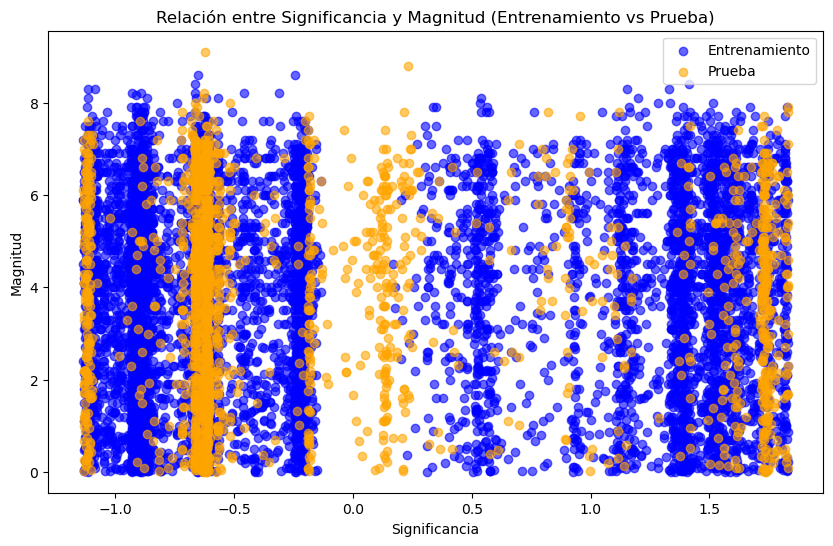

In [68]:
#Escalar los conjuntos
import matplotlib.pyplot as plt

df = earthquakes.copy()

# Supongamos que 'Significancia' es una columna de tu DataFrame df y está incluida en el conjunto de características X
# Extraer la columna de significancia ya normalizada del conjunto escalado X_scaled
significancia = X_scaled[:, df.columns.get_loc('significance')]
magnitud = y_regresion  # 'magnitud' es la variable de salida para la regresión

# Separar significancia en conjuntos de entrenamiento y prueba para el gráfico
significancia_train = significancia[:len(X_train_reg)]
significancia_test = significancia[len(X_train_reg):]

# Separar magnitud en conjuntos de entrenamiento y prueba para el gráfico
magnitud_train = y_train_reg
magnitud_test = y_test_reg

# Crear el scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(significancia_train, magnitud_train, color='blue', label='Entrenamiento', alpha=0.6)
plt.scatter(significancia_test, magnitud_test, color='orange', label='Prueba', alpha=0.6)
plt.xlabel('Significancia')
plt.ylabel('Magnitud')
plt.title('Relación entre Significancia y Magnitud (Entrenamiento vs Prueba)')
plt.legend()
plt.show()


In [70]:
from sklearn.linear_model import LinearRegression

In [72]:
#Entrenar el modelo
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Inicializar el modelo de regresión
modelo_regresion = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo_regresion.fit(X_train_reg, y_train_reg)

# Realizar predicciones en el conjunto de prueba
y_pred_reg = modelo_regresion.predict(X_test_reg)

# Evaluar el modelo de regresión
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
r2_reg = r2_score(y_test_reg, y_pred_reg)

print("Métricas del modelo de regresión:")
print(f"Error cuadrático medio (MSE): {mse_reg}")
print(f"Coeficiente de determinación (R^2): {r2_reg}")


Métricas del modelo de regresión:
Error cuadrático medio (MSE): 0.7878565069550418
Coeficiente de determinación (R^2): 0.8247102071765123


## Para evaluar el modelo de regresión vamos a usar el rmse

In [58]:
from sklearn.metrics import root_mean_squared_error

In [78]:
#Evaluar las métricas aquí
from sklearn.metrics import mean_squared_error

# Calcular el RMSE del modelo de regresión
rmse_reg = mean_squared_error(y_test_reg, y_pred_reg, squared=False)

print("Métricas del modelo de regresión:")
print(f"Error cuadrático medio (RMSE): {rmse_reg}")


Métricas del modelo de regresión:
Error cuadrático medio (RMSE): 0.8876128136496464


C:\Users\alejo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Clasificador

Para el clasificador usaremos RandomForest.

In [84]:
## Aqui podemos repetir el codigo de la estandarizacion y el spliteo del dataset para realizar la clasificacion

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Supongamos que ya tienes el dataset cargado en un DataFrame llamado 'df'
# Definir las columnas de entrada (X) y salida (Y) para el conjunto de clasificación
X = df.drop(columns=['magnitude', 'tsunami'])  # Ajusta según las columnas de interés
y_clasificacion = df['tsunami']               # Objetivo para clasificación

# Dividir el conjunto de datos para clasificación
X_train_clas, X_test_clas, y_train_clas, y_test_clas = train_test_split(
    X, y_clasificacion, test_size=0.2, random_state=42
)

# Inicializar el clasificador Random Forest
modelo_clasificacion_rf = RandomForestClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
modelo_clasificacion_rf.fit(X_train_clas, y_train_clas)

# Realizar predicciones en el conjunto de prueba
y_pred_clas_rf = modelo_clasificacion_rf.predict(X_test_clas)

# Imprimir las métricas básicas
print("Exactitud (Accuracy):", modelo_clasificacion_rf.score(X_test_clas, y_test_clas))


Exactitud (Accuracy): 0.9866995073891626


In [61]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
#Escribe aqui tu solucion


### Evaluación de métricas

In [86]:
from sklearn.metrics import f1_score, recall_score, precision_score

In [88]:
# Calcular las métricas de evaluación
f1 = f1_score(y_test_clas, y_pred_clas_rf)
recall = recall_score(y_test_clas, y_pred_clas_rf)
precision = precision_score(y_test_clas, y_pred_clas_rf)

# Imprimir las métricas
print(f"F1-score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")


F1-score: 0.9532062391681109
Recall: 0.9615384615384616
Precision: 0.9450171821305842


In [ ]:
#Escribe aqui tu solucion (Se espera que haga print(metrica(y_test, y_predict)))


0.9484536082474226
0.965034965034965
0.9324324324324325


### Bueno... Las métricas del clasificador se ven muy buenas  usando los datos. ¿Tan perfecto es este dataset?

Un problema muy común que ocurre en algunos conjuntos de datos es el desbalance de clases.

Un desbalance de clases puede afectar negativamente el rendimiento de un algoritmo clasificador de varias maneras:
* Desempeño sesgado: Los clasificadores pueden volverse sesgados hacia la clase mayoritaria, prediciendo incorrectamente la clase minoritaria.

* Métricas engañosas: Métricas como la exactitud pueden ser engañosas, ya que un clasificador que predice siempre la clase mayoritaria puede parecer preciso.

* Menor capacidad de generalización: El clasificador puede tener dificultades para generalizar adecuadamente a nuevos datos, especialmente en la predicción de la clase minoritaria.

### Demuestra con un gráfico decbarras que existe un desbalance de clases en la columna Tsunami

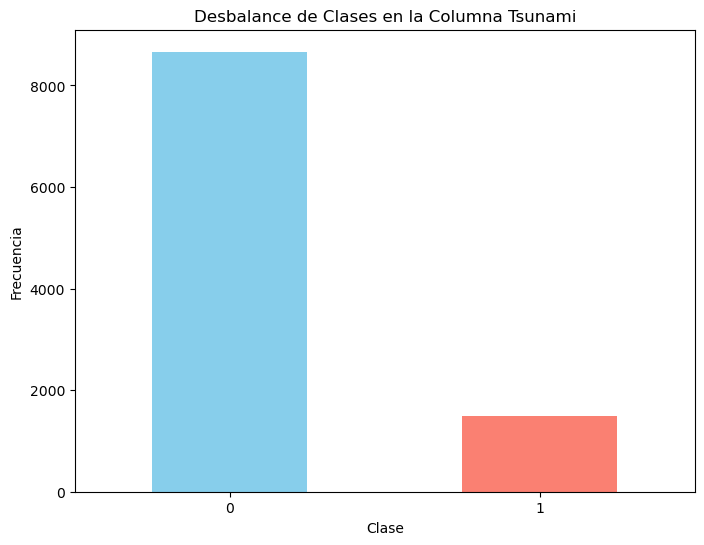

In [90]:
import matplotlib.pyplot as plt

# Suponiendo que ya tienes cargado el dataframe 'df'
# Contar la frecuencia de cada clase en la columna 'Tsunami'
class_counts = df['tsunami'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8,6))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Desbalance de Clases en la Columna Tsunami')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()


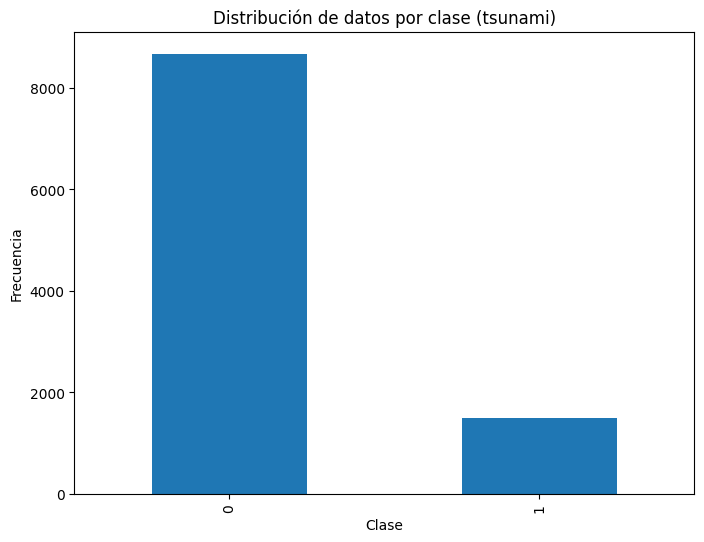

In [ ]:
# Agrega tu respuesta aquí
